# Линейная регрессия: теория и практика

## Содержание:
1. Математические основы линейной регрессии
2. Реализация простой линейной регрессии
3. Метрики оценки модели
4. Множественная линейная регрессия
5. Визуализация и анализ результатов

## 1. Математические основы линейной регрессии

### Теория

Линейная регрессия - это метод моделирования зависимости между зависимой переменной y и одной или несколькими независимыми переменными x.

#### Основное уравнение простой линейной регрессии:
$y = mx + b + \epsilon$

где:
- $y$ - зависимая переменная (целевая)
- $x$ - независимая переменная (признак)
- $m$ - коэффициент наклона (вес признака)
- $b$ - свободный член (смещение)
- $\epsilon$ - случайная ошибка

#### Функция потерь (Cost Function):
$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{pred} - y_{true})^2$

Метод наименьших квадратов минимизирует сумму квадратов отклонений между:
- Фактическими значениями ($y_{true}$)
- Предсказанными значениями ($y_{pred}$)

#### Оптимальные коэффициенты:
$m = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$

$b = \bar{y} - m\bar{x}$

где $\bar{x}$ и $\bar{y}$ - средние значения $x$ и $y$ соответственно.

В этом примере мы построим модель линейной регрессии для набора данных о медицинских расходах. Набор данных содержит такие независимые переменные, как возраст, пол, индекс массы тела (ИМТ), количество детей, статус курения и регион, а также зависимую переменную - стоимость медицинской страховки. Мы будем предсказывать индивидуальные медицинские расходы, выставляемые страховой компанией.

# Определение и принцип работы

Построим модель, используя **линейную регрессию**.

Линейная регрессия — это алгоритм **обучения с учителем**, который используется, когда целевая (зависимая) переменная является **непрерывным** вещественным числом. Она устанавливает взаимосвязь между зависимой переменной $y$ и одной или несколькими независимыми переменными $x$ с помощью линии наилучшего приближения. Модель работает на принципе метода наименьших квадратов (МНК) или среднеквадратической ошибки (MSE). В статистике МНК — это метод оценки неизвестных параметров функции линейной регрессии, целью которого является минимизация суммы квадратов разностей между наблюдаемой зависимой переменной в наборе данных и значениями, предсказанными функцией регрессии.

## Представление гипотезы

Мы будем использовать $x_i$ для обозначения независимой переменной и $y_i$ для обозначения зависимой переменной. Пара $(x_i,y_i)$ называется обучающим примером. Индекс $i$ в обозначении — это просто порядковый номер в обучающей выборке. Если у нас есть $m$ обучающих примеров, то $i = 1,2,3,\ldots,m$.

Целью обучения с учителем является нахождение *функции гипотезы $h$*, которая для данного набора обучающих данных может быть использована для оценки $y$ на основе $x$. Функция гипотезы представляется как:

$$h_\theta(x_i) = \theta_0 + \theta_1x_i$$

где $\theta_0,\theta_1$ — параметры гипотезы. Это уравнение для **простой/одномерной линейной регрессии**.

Для **множественной линейной регрессии**, где существует более одной независимой переменной, мы будем использовать $x_{ij}$ для обозначения независимых переменных и $y_i$ для обозначения зависимой переменной. Если у нас есть $n$ независимых переменных, то $j=1,2,3,\ldots,n$. Функция гипотезы представляется как:

$$h_\theta(x_i) = \theta_0 + \theta_1x_{i1} + \theta_2x_{i2} + \cdots + \theta_jx_{ij} + \cdots + \theta_nx_{in}$$

где:
- $\theta_0,\theta_1,\ldots,\theta_j,\ldots,\theta_n$ — параметры гипотезы
- $m$ — количество обучающих примеров
- $n$ — количество независимых переменных
- $x_{ij}$ — значение $j$-й характеристики для $i$-го обучающего примера

## Импорт библиотек и набора данных
Сейчас мы импортируем несколько библиотек Python, необходимых для нашего анализа, и загрузим набор данных.

In [1]:
# Импорт библиотек
import pandas as pd  # для обработки данных
import numpy as np  # для математических операций
import matplotlib.pyplot as plt  # для визуализации
import seaborn as sns  # для улучшенной визуализации

# Настройка общего стиля визуализации
plt.style.use('default')  # базовый стиль matplotlib
sns.set_theme(
    style="whitegrid",  # сетка для лучшей читаемости
    palette="deep",     # более насыщенная цветовая палитра
    font_scale=1.2      # увеличиваем размер шрифта
)

# Настройка параметров графиков
plt.rcParams.update({
    'figure.figsize': [10, 6],        # размер графиков
    'font.size': 12,                  # базовый размер шрифта
    'font.weight': 'normal',          # нормальная толщина шрифта
    'axes.titlesize': 14,             # размер заголовка
    'axes.titleweight': 'bold',       # жирный заголовок
    'axes.labelsize': 12,             # размер подписей осей
    'axes.grid': True,                # включаем сетку
    'grid.alpha': 0.3,                # прозрачность сетки
    'axes.spines.top': False,         # убираем верхнюю линию
    'axes.spines.right': False        # убираем правую линию
})

# Настройка формата чисел для меток
plt.rcParams['axes.formatter.use_locale'] = True  # локализация чисел

In [2]:
# Загрузка набора данных
try:
    # Пробуем загрузить из текущей директории
    df = pd.read_csv('insurance.csv')
except FileNotFoundError:
    try:
        # Пробуем загрузить из директории input
        df = pd.read_csv('../input/insurance.csv')
    except FileNotFoundError:
        # Загружаем из директории данных лекции
        df = pd.read_csv('IAD/LEC_4_linear_regression/insurance.csv')

print('\nКоличество строк и столбцов в наборе данных:', df.shape)
print('\nПервые несколько строк набора данных:')
display(df.head())


Количество строк и столбцов в наборе данных: (1338, 7)

Первые несколько строк набора данных:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


После импорта набора данных мы видим, что его размерность составляет $(1338, 7)$. Это означает, что у нас есть $m=1338$ обучающих примеров и $n=7$ переменных. Целевой переменной является `charges` (страховые выплаты), а остальные шесть переменных (`age`, `sex`, `bmi`, `children`, `smoker`, `region`) являются независимыми переменными. Поскольку у нас несколько независимых переменных, мы будем использовать множественную линейную регрессию.

### Функция гипотезы
Функция гипотезы для нашего набора данных имеет вид:

$$h_\theta(x_i) = \theta_0 + \theta_1 \cdot \text{age} + \theta_2 \cdot \text{sex} + \theta_3 \cdot \text{bmi} + \theta_4 \cdot \text{children} + \theta_5 \cdot \text{smoker} + \theta_6 \cdot \text{region}$$

### Примеры
Для первого наблюдения $(i=1)$:
$$h_\theta(x_1) = \theta_0 + \theta_1 \cdot 19 + \theta_2 \cdot \text{female} + \theta_3 \cdot 27.900 + \theta_4 \cdot 1 + \theta_5 \cdot \text{yes} + \theta_6 \cdot \text{southwest}$$
$$y_1 = 16884.924$$

Для третьего наблюдения $(i=3)$:
$$h_\theta(x_3) = \theta_0 + \theta_1 \cdot 28 + \theta_2 \cdot \text{male} + \theta_3 \cdot 33.000 + \theta_4 \cdot 3 + \theta_5 \cdot \text{no} + \theta_6 \cdot \text{northwest}$$
$$y_3 = 4449.462$$

### Векторное представление
Первый обучающий пример можно представить в векторной форме:
$$x_1 = \begin{pmatrix} x_{11} & x_{12} & x_{13} & x_{14} & x_{15} & x_{16} \end{pmatrix} = \begin{pmatrix} 19 & \text{female} & 27.900 & 1 & \text{no} & \text{northwest} \end{pmatrix}$$

*Примечание*: В Python индексация начинается с 0, но в математической нотации мы используем индексацию с 1 для ясности.

## Матричная формулировка

В общем виде вектор признаков можно записать как:
$$x_{ij} = \begin{pmatrix} x_{i1} & x_{i2} & \cdots & x_{in} \end{pmatrix}$$

Теперь объединим все отдельные векторы в единую входную матрицу $X$ размера $(m,n)$, которая содержит все обучающие примеры:

$$X = \begin{pmatrix} 
x_{11} & x_{12} & \cdots & x_{1n} \\
x_{21} & x_{22} & \cdots & x_{2n} \\
x_{31} & x_{32} & \cdots & x_{3n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m1} & x_{m2} & \cdots & x_{mn}
\end{pmatrix}_{(m,n)}$$

Параметры функции и зависимую переменную представим в векторной форме:

$$\theta = \begin{pmatrix} 
\theta_0 \\ \theta_1 \\ \vdots \\ \theta_j \\ \vdots \\ \theta_n 
\end{pmatrix}_{(n+1,1)} \quad
y = \begin{pmatrix} 
y_1 \\ y_2 \\ \vdots \\ y_i \\ \vdots \\ y_m 
\end{pmatrix}_{(m,1)}$$

Таким образом, функцию гипотезы в векторной форме можно записать как:
$$h_\theta(x) = X\theta$$

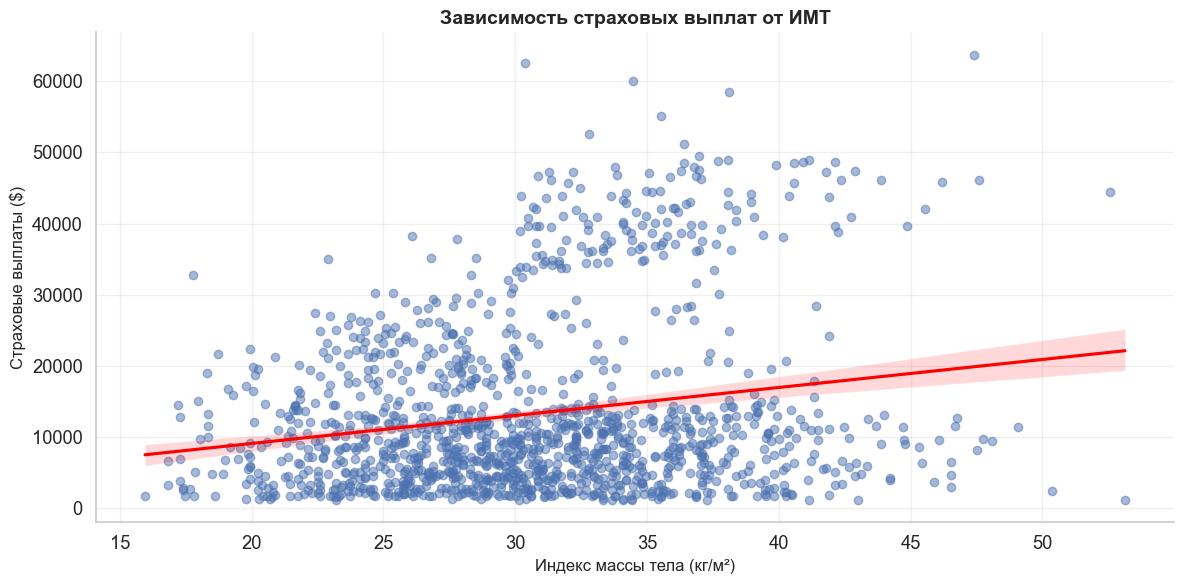

In [3]:
# Визуализация зависимости между ИМТ и страховыми выплатами
plt.figure(figsize=(12, 6))
sns.regplot(
    data=df,
    x='bmi',
    y='charges',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.xlabel('Индекс массы тела (кг/м²)')
plt.ylabel('Страховые выплаты ($)')
plt.title('Зависимость страховых выплат от ИМТ')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

На графике выше мы построили линию регрессии для наших данных.

## Функция стоимости (Cost Function)

Функция стоимости измеряет ошибку модели с точки зрения её способности оценивать взаимосвязь между $x$ и $y$. 
Мы можем измерить точность нашей функции гипотезы, используя функцию стоимости, которая вычисляет среднюю разницу между предсказанными и фактическими значениями зависимой переменной в наборе данных.

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2$$
$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x_i) - y_i)^2$$

Для реализации линейной регрессии добавим дополнительный признак $x_0$ со значением 1:
$$x_0 = \begin{pmatrix} x_{10} & x_{20} & x_{30} & \cdots & x_{m0} \end{pmatrix}$$

где $x_{i0} = 1$ для всех $i$. Входная матрица примет вид:

$$X = \begin{pmatrix} 
x_{10} & x_{11} & x_{12} & \cdots & x_{1n} \\
x_{20} & x_{21} & x_{22} & \cdots & x_{2n} \\
x_{30} & x_{31} & x_{32} & \cdots & x_{3n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
x_{m0} & x_{m1} & x_{m2} & \cdots & x_{mn}
\end{pmatrix}_{(m,n+1)}$$

где $x_{10}, x_{20}, x_{30}, \ldots, x_{m0} = 1$ для удобства вычислений.

Теперь мы можем переписать функцию стоимости метода наименьших квадратов в матричной форме:
$$J(\theta) = \frac{1}{m} (X\theta - y)^T(X\theta - y)$$

Рассмотрим размерности матриц при умножении:
- Входная матрица $X$ имеет размер $(m,n+1)$
- Вектор параметров $\theta$ имеет размер $(n+1,1)$
- Вектор зависимой переменной $y$ имеет размер $(m,1)$

Произведение $X_{(m,n+1)}\theta_{(n+1,1)}$ даст вектор размера $(m,1)$. Затем $(X\theta - y)^T_{(1,m)}(X\theta - y)_{(m,1)}$ даст скаляр - значение функции стоимости.

## Нормальное уравнение

Нормальное уравнение представляет собой аналитическое решение задачи линейной регрессии с функцией стоимости метода наименьших квадратов. Для минимизации функции стоимости $J(\theta)$ возьмем частную производную по $\theta$ и приравняем её к нулю:

$$\min_{\theta_0,\theta_1,\ldots,\theta_n} J(\theta_0,\theta_1,\ldots,\theta_n)$$
$$\frac{\partial J(\theta_j)}{\partial\theta_j} = 0$$

где $j = 0,1,2,\ldots,n$

Применим частную производную к нашей функции стоимости:
$$\frac{\partial J(\theta_j)}{\partial\theta_j} = \frac{\partial}{\partial \theta} \frac{1}{m}(X\theta - y)^T(X\theta - y)$$

Для упрощения опустим множитель $\frac{1}{m}$, так как мы приравниваем производную к нулю. Распишем $J(\theta)$:

$$J(\theta) = (X\theta - y)^T(X\theta - y)$$
$$= (\theta^T X^T - y^T)(X\theta - y)$$
$$= \theta^T X^T X \theta - y^T X \theta - \theta^T X^T y + y^T y$$
$$= \theta^T X^T X \theta - 2\theta^T X^T y + y^T y$$

Заметим, что $y^T_{(1,m)} X_{(m,n+1)} \theta_{(n+1,1)} = \theta^T_{(1,n+1)} X^T_{(n+1,m)} y_{(m,1)}$, так как это скаляр.

Вычислим производную:
$$\frac{\partial J(\theta)}{\partial \theta} = \frac{\partial}{\partial \theta} (\theta^T X^T X \theta - 2\theta^T X^T y + y^T y)$$
$$= X^T X \frac{\partial \theta^T \theta}{\partial\theta} - 2X^T y \frac{\partial \theta^T}{\partial\theta} + \frac{\partial y^T y}{\partial\theta}$$

Используем правила дифференцирования:
- $\frac{\partial x^2}{\partial x} = 2x$
- $\frac{\partial kx^2}{\partial x} = 2kx$
- $\frac{\partial \text{const}}{\partial x} = 0$

Получаем:
$$\frac{\partial J(\theta)}{\partial\theta} = 2X^T X \theta - 2X^T y + 0$$
$$0 = 2X^T X \theta - 2X^T y$$
$$X^T X \theta = X^T y$$

Итоговое нормальное уравнение для линейной регрессии:
$$\theta = (X^T X)^{-1} X^T y$$

## Exploratory data analysis

In [4]:
# Описательная статистика набора данных
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###  Check for missing value

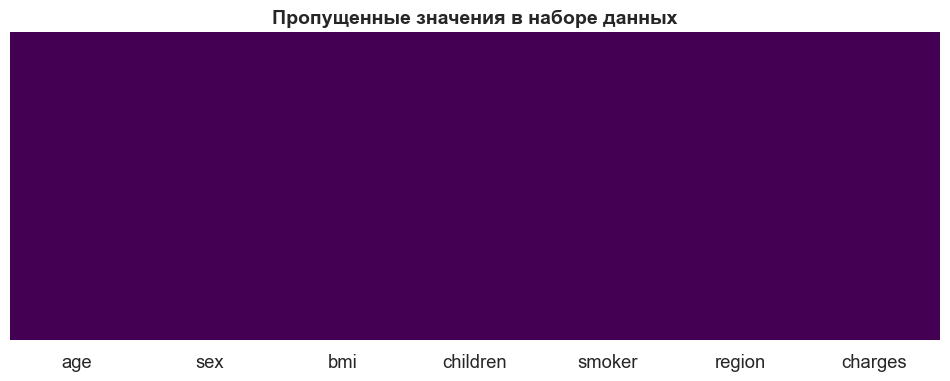

In [5]:
# Проверка наличия пропущенных значений
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Пропущенные значения в наборе данных');

В данных отсутствуют пропущенные значения.

### Визуализация данных

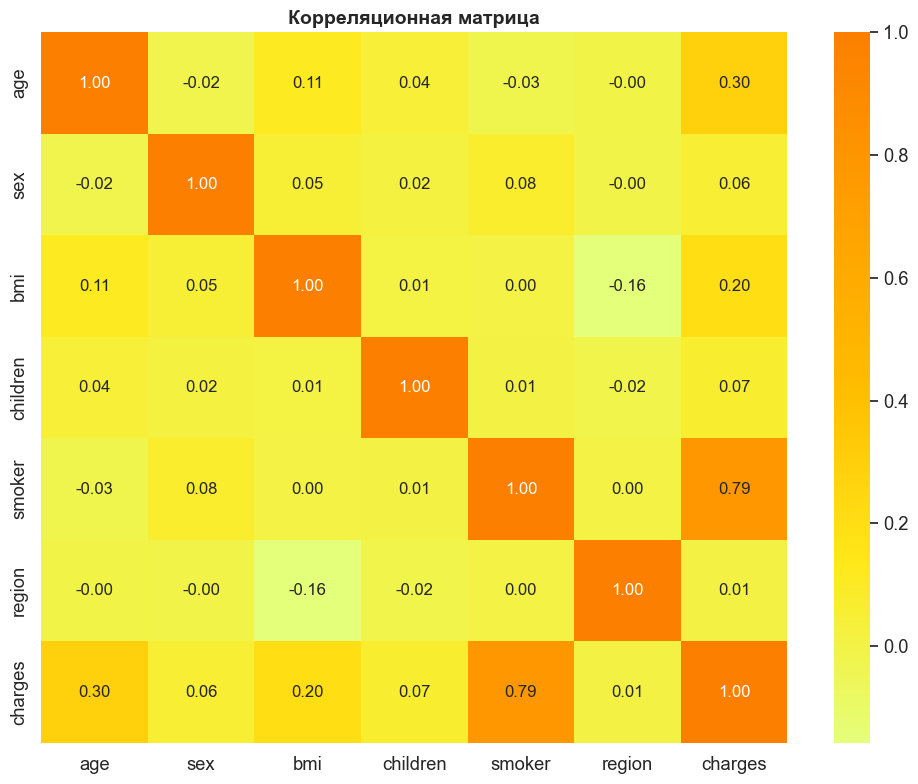

In [6]:
# Преобразование категориальных переменных в числовые
df_numeric = df.copy()
df_numeric['sex'] = df_numeric['sex'].map({'female': 0, 'male': 1})
df_numeric['smoker'] = df_numeric['smoker'].map({'no': 0, 'yes': 1})
df_numeric['region'] = pd.factorize(df_numeric['region'])[0]

# Построение корреляционной матрицы
corr = df_numeric.corr()

# Создание тепловой карты
plt.figure(figsize=(10, 8))  # Увеличиваем размер графика для лучшей читаемости
sns.heatmap(corr, cmap='Wistia', annot=True, fmt='.2f')
plt.title('Корреляционная матрица')
plt.tight_layout()  # Автоматически настраиваем отступы
plt.show();

Между переменными не наблюдается сильной корреляции.

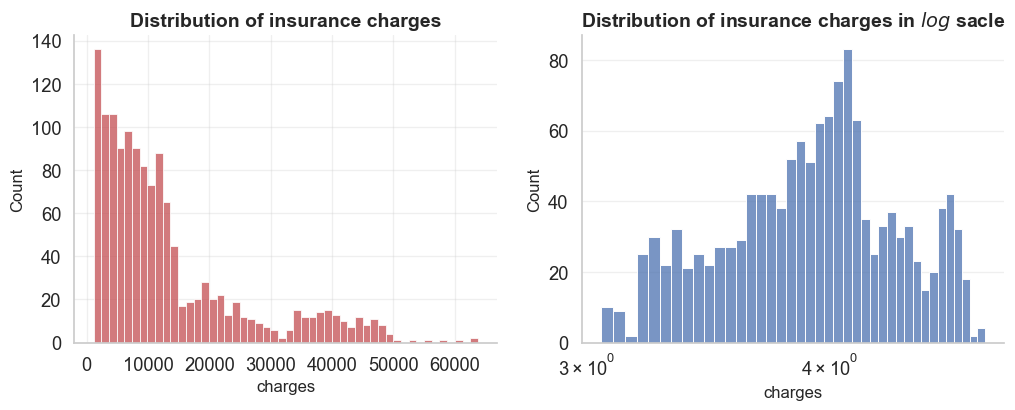

In [10]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.histplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.histplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

Если посмотреть на левый график, можно заметить, что страховые выплаты варьируются от 1120 до 63500, и распределение имеет правостороннюю асимметрию. На правом графике мы применили логарифмическое преобразование, и распределение стало более близким к нормальному. Для дальнейшего анализа мы будем использовать логарифмированные значения целевой переменной charges.

/var/folders/32/tn9_k17x1wbfxhhphlt7mjx00000gn/T/ipykernel_13908/1961728721.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
/var/folders/32/tn9_k17x1wbfxhhphlt7mjx00000gn/T/ipykernel_13908/1961728721.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)


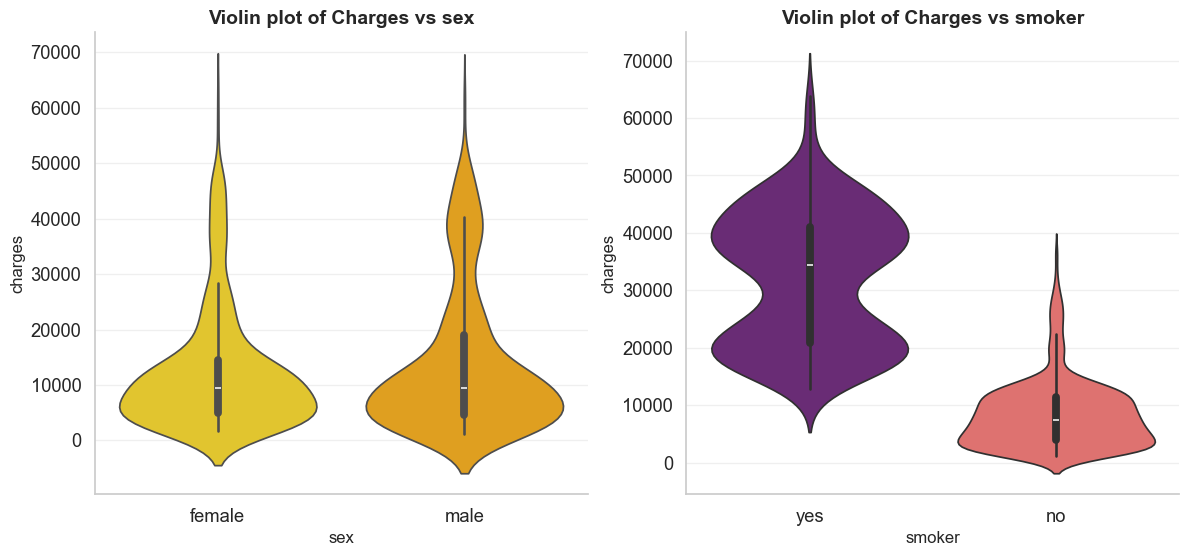

In [11]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

По левому графику видно, что страховые выплаты для мужчин и женщин находятся примерно в одном диапазоне, со средним значением около 5000 долларов. На правом графике показано, что страховые выплаты для курильщиков имеют гораздо более широкий диапазон по сравнению с некурящими. Средняя выплата для некурящих составляет примерно 5000 долларов. Для курильщиков минимальная страховая выплата начинается от 5000 долларов.

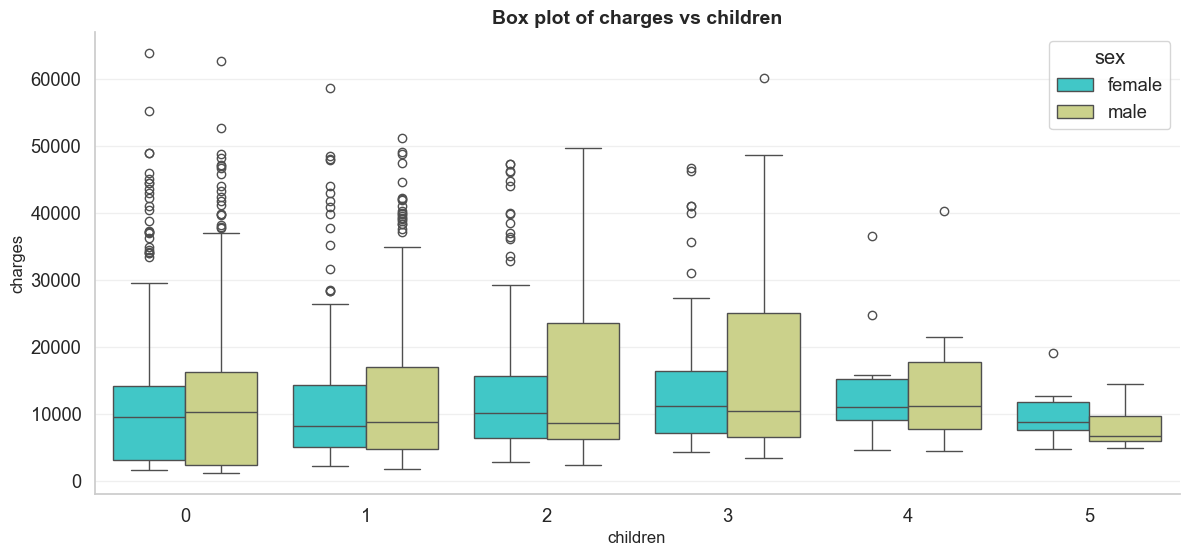

In [12]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

In [13]:
# Получение списка числовых столбцов
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Создание словаря с агрегирующими функциями для каждого числового столбца
agg_dict = {col: ['mean', 'min', 'max'] for col in numeric_columns}

# Группировка по количеству детей и вычисление статистик
stats_by_children = df.groupby('children').agg(agg_dict).round(2)

# Переименование столбцов на русский язык
stats_by_children.columns = [f'{col[0]} ({col[1]})' for col in stats_by_children.columns]

display(stats_by_children)

,age (mean),age (min),age (max),bmi (mean),bmi (min),bmi (max),children (mean),children (min),children (max),charges (mean),charges (min),charges (max)
children,,,,,,,,,,,,
0,38.44,18,64,30.55,15.96,53.13,0.0,0,0,12365.98,1121.87,63770.43
1,39.45,18,64,30.62,16.82,52.58,1.0,1,1,12731.17,1711.03,58571.07
2,39.45,18,64,30.98,16.82,48.07,2.0,2,2,15073.56,2304.00,49577.66
3,41.57,18,64,30.68,18.90,46.53,3.0,3,3,15355.32,3443.06,60021.40
4,39.00,18,61,31.39,24.42,41.47,4.0,4,4,13850.66,4504.66,40182.25
5,35.61,19,52,29.60,18.30,46.75,5.0,5,5,8786.04,4687.80,19023.26


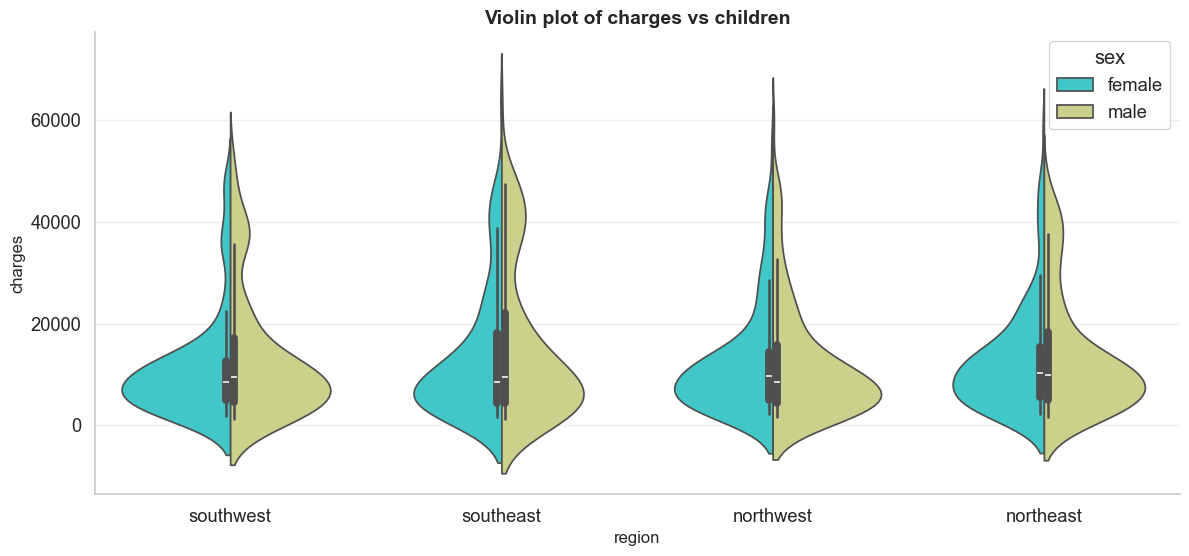

In [14]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children');

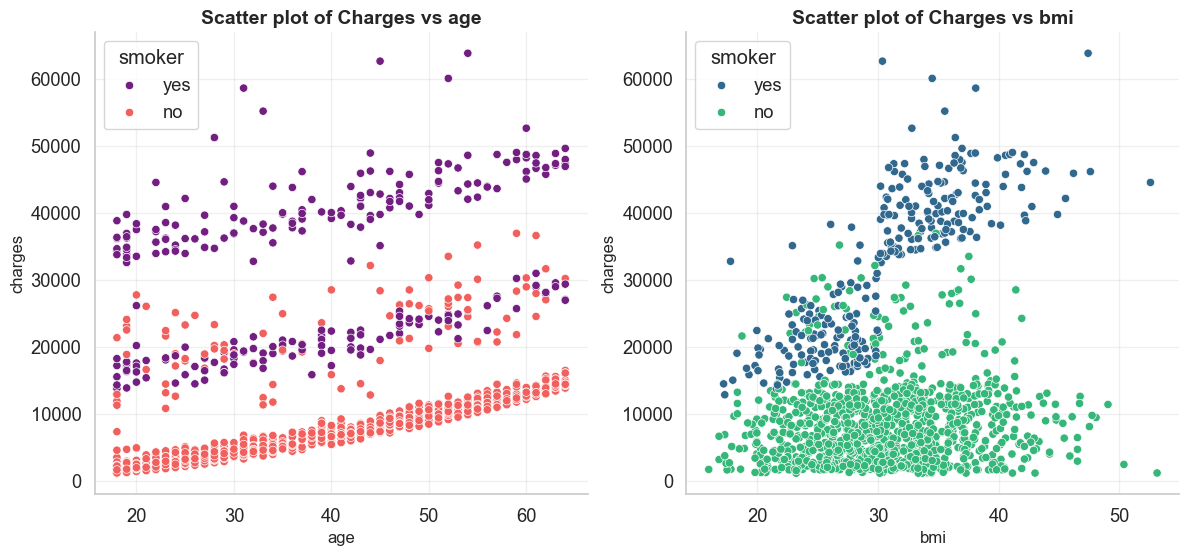

In [15]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

На левом графике видно, что минимальный возраст застрахованных лиц составляет 18 лет. Существуют различные уровни страховых выплат: большинство некурящих попадают в 1-й и 2-й уровни, в то время как для курильщиков страховые выплаты начинаются со 2-го и 3-го уровней.

Индекс массы тела (ИМТ) - это показатель, основанный на весе и росте, который применяется к взрослым мужчинам и женщинам. В наших данных ИМТ варьируется от 16 кг/м² до 54 кг/м².

## Предварительная обработка данных
### Кодирование категориальных переменных
Алгоритмы машинного обучения не могут работать напрямую с категориальными данными, поэтому их необходимо преобразовать в числовой формат.
 1. Label Encoding (метки)
 2. One hot encoding (бинарное кодирование)
 3. Устранение мультиколлинеарности

**Label encoding** преобразует текстовые метки в числовой формат, чтобы алгоритмы могли с ними работать.

**One hot encoding** представляет категориальные переменные в виде бинарных векторов, что делает представление категориальных данных более выразительным. Сначала категориальные значения преобразуются в целые числа (label encoding), затем каждое целое число представляется как бинарный вектор, где все значения равны нулю, кроме индекса данного целого числа, который отмечен единицей.

**Мультиколлинеарность** возникает, когда независимые переменные сильно коррелируют между собой, то есть когда одну переменную можно предсказать на основе других.

Используя функцию *pandas get_dummies*, мы можем выполнить все три шага в одной строке кода. Мы применим эту функцию для создания фиктивных переменных для признаков пола, количества детей, статуса курения и региона. Установка параметра *drop_first=True* позволяет избежать мультиколлинеарности путем удаления одной из фиктивных переменных и исходной переменной.

In [16]:
# Создание фиктивных переменных
categorical_columns = ['sex', 'children', 'smoker', 'region']

# Преобразуем children в категориальную переменную, так как это дискретные значения
df['children'] = df['children'].astype('category')

# Создаем фиктивные переменные
df_encode = pd.get_dummies(
    data=df,
    prefix_sep='_',
    columns=categorical_columns,
    drop_first=True,  # избегаем мультиколлинеарности
    dtype='int8'      # экономим память
)

# Проверяем, что преобразование прошло успешно
assert len(df) == len(df_encode), "Количество строк изменилось после кодирования"
assert not df_encode.isnull().any().any(), "Обнаружены пропущенные значения после кодирования"

In [14]:
# Проверка результатов кодирования
print('Столбцы в исходном наборе данных:\n', df.columns.values)
print('\nРазмерность исходного набора данных:', df.shape)
print('\nСтолбцы после кодирования:\n', df_encode.columns.values)
print('\nРазмерность набора данных после кодирования:', df_encode.shape)

Столбцы в исходном наборе данных:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Размерность исходного набора данных: (1338, 7)

Столбцы после кодирования:
 ['age' 'bmi' 'charges' 'sex_male' 'children_1' 'children_2' 'children_3'
 'children_4' 'children_5' 'smoker_yes' 'region_northwest'
 'region_southeast' 'region_southwest']

Размерность набора данных после кодирования: (1338, 13)


### Преобразование Бокса-Кокса
Преобразование Бокса-Кокса - это способ преобразования ненормально распределенной зависимой переменной к нормальному виду. Нормальность - важное предположение для многих статистических методов; если данные не нормальны, применение преобразования Бокса-Кокса позволяет использовать более широкий спектр тестов. Для выполнения этого преобразования нужно найти значение λ и применить следующее правило к переменной:

$$\begin{cases}
\frac{y^\lambda - 1}{\lambda}, & y_i > 0 \\
\log(y_i), & \lambda = 0
\end{cases}$$

Суть преобразования Бокса-Кокса заключается в нахождении значения λ, что на практике достаточно просто реализуемо. Следующая функция возвращает преобразованную переменную, значение λ и доверительный интервал.

In [17]:
# Преобразование Бокса-Кокса
from scipy.stats import boxcox
y_bc, lam, ci = boxcox(df_encode['charges'], alpha=0.05)

# Для данной модели это преобразование не дало лучших результатов,
# поэтому будем использовать логарифмическое преобразование
print('Доверительный интервал (Confidence interval):', ci)
print('Значение λ:', lam)

Доверительный интервал (Confidence interval): (-0.011402906172930048, 0.09880968597671798)
Значение λ: 0.043649061187374535


In [16]:
# Логарифмическое преобразование
df_encode['charges'] = np.log(df_encode['charges'])

Исходные категориальные переменные были удалены, и для каждой категориальной переменной было создано фиктивное кодирование, при этом одна из категорий была опущена во избежание мультиколлинеарности. Таким образом, мы выполнили все три этапа кодирования с помощью функции get_dummies.

## Разделение данных на обучающую и тестовую выборки

In [24]:
# Разделение на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

X = df_encode.drop('charges', axis=1)  # Независимые переменные
y = df_encode['charges']  # Зависимая переменная

# Разделение данных (70% - обучающая выборка, 30% - тестовая)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=23
)

## Построение модели
На этом этапе мы построим модель, используя наше уравнение линейной регрессии $\theta = (X^T X)^{-1} X^T y$. На первом шаге нам нужно добавить признак $x_0 = 1$ к нашему набору данных.

In [25]:
# Шаг 1: добавление x0 = 1 к набору данных
X_train_0 = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Шаг 2: построение модели
theta = np.matmul(
    np.linalg.inv(np.matmul(X_train_0.T, X_train_0)),
    np.matmul(X_train_0.T, y_train)
)

In [26]:
# Параметры модели линейной регрессии
parameter = ['theta_' + str(i) for i in range(X_train_0.shape[1])]
columns = ['пересечение:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({
    'Параметр': parameter,
    'Признак': columns,
    'theta': theta
})

In [27]:
# Использование модуля scikit-learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)  # Примечание: x_0=1 добавляется автоматически

# Параметры модели
sk_theta = [lin_reg.intercept_] + list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Параметр,Признак,theta,Sklearn_theta
0,theta_0,пересечение:x_0=1,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,sex_male,-0.067767,-0.067767
4,theta_4,children_1,0.149457,0.149457
5,theta_5,children_2,0.272919,0.272919
6,theta_6,children_3,0.244095,0.244095
7,theta_7,children_4,0.523339,0.523339
8,theta_8,children_5,0.466030,0.466030
9,theta_9,smoker_yes,1.550481,1.550481


Параметры, полученные обоими методами, совпадают. Таким образом, мы успешно построили модель с использованием нормального уравнения и проверили её с помощью модуля sklearn для линейной регрессии. Давайте перейдем к следующему шагу - предсказанию и оценке модели.

## Оценка модели

Мы будем предсказывать значения целевой переменной для тестового набора данных, используя параметры нашей модели. Затем сравним предсказанные значения с фактическими значениями из тестового набора. Для этого используем **среднеквадратическую ошибку** (MSE):

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2$$

**Коэффициент детерминации** ($R^2$) - это статистическая мера, показывающая, насколько хорошо модель соответствует данным. $R^2$ всегда находится в диапазоне от 0 до 100%. Значение 0% указывает, что модель не объясняет изменчивость данных относительно среднего значения. Значение 100% указывает, что модель полностью объясняет изменчивость данных.

$$R^2 = 1 - \frac{\text{SSE}}{\text{SST}}$$

где:
- **SSE** (Sum of Squared Errors) = сумма квадратов ошибок
- **SST** (Total Sum of Squares) = общая сумма квадратов

$$\text{SSE} = \sum_{i=1}^{m}(\hat{y}_i - y_i)^2$$
$$\text{SST} = \sum_{i=1}^{m}(y_i - \bar{y})^2$$

где:
- $\hat{y}$ - предсказанные значения
- $\bar{y}$ - среднее значение фактических данных
- $y$ - фактические значения

In [31]:
# Метод нормального уравнения
y_pred_norm = np.matmul(X_test_0, theta)

# Вычисление среднеквадратической ошибки (MSE)
J_mse = np.sum((y_pred_norm - y_test)**2) / X_test_0.shape[0]

# Вычисление R-квадрата
sse = np.sum((y_pred_norm - y_test)**2)  # Сумма квадратов ошибок (SSE)
sst = np.sum((y_test - y_test.mean())**2)  # Общая сумма квадратов (SST)
R_square = 1 - (sse/sst)

print('Среднеквадратическая ошибка (MSE) или J(θ):', round(J_mse, 4))
print('Коэффициент детерминации (R²) для метода нормального уравнения:', round(R_square, 4))
print(f'Процент объяснённой дисперсии: {round(R_square * 100, 2)}%')

Среднеквадратическая ошибка (MSE) или J(θ): 0.1873
Коэффициент детерминации (R²) для метода нормального уравнения: 0.7796
Процент объяснённой дисперсии: 77.96%


In [32]:
# Использование модуля sklearn для регрессии
y_pred_sk = lin_reg.predict(X_test)

# Вычисление среднеквадратической ошибки (MSE)
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# Вычисление коэффициента детерминации (R²)
R_square_sk = lin_reg.score(X_test, y_test)
print('Среднеквадратическая ошибка (MSE) или J(θ):', round(J_mse_sk, 4))
print('Коэффициент детерминации (R²) из библиотеки scikit-learn:', round(R_square_sk, 4))
print(f'Процент объяснённой дисперсии: {round(R_square_sk * 100, 2)}%')

Среднеквадратическая ошибка (MSE) или J(θ): 0.1873
Коэффициент детерминации (R²) из библиотеки scikit-learn: 0.7796
Процент объяснённой дисперсии: 77.96%


Модель показывает значение $R^2 = 77.95\%$, что говорит о хорошем качестве подгонки к тестовым данным. Тем не менее, производительность модели можно улучшить различными способами:
1. Подбор оптимальных гиперпараметров
2. Использование регуляризации
3. Добавление полиномиальных признаков
4. Применение других методов масштабирования

**Важное замечание**: Мы применили логарифмическое преобразование к целевой переменной (`charges`). Поэтому при использовании модели для предсказания на новых данных необходимо выполнить обратное преобразование (экспоненту):

$$\text{charges}_{\text{исходные}} = e^{\text{charges}_{\text{предсказанные}}}$$

Это нужно учитывать при внедрении модели в производственную среду.

## Валидация модели

Для проверки линейной регрессионной модели необходимо проверить несколько ключевых допущений. Основные допущения для моделей *линейной регрессии*:

1. **Линейная зависимость**: Связь между зависимой и независимыми переменными должна быть *линейной*. Это можно проверить, построив диаграмму рассеяния фактических значений относительно предсказанных.

2. **Нормальное распределение остатков**: График остаточных ошибок должен следовать *нормальному распределению*.

3. **Нулевое среднее остатков**: *Среднее значение* *остаточных ошибок* должно быть равно 0 или максимально близко к 0.

4. **Многомерная нормальность**: Линейная регрессия требует, чтобы все переменные имели многомерное нормальное распределение. Это допущение лучше всего проверять с помощью Q-Q графика.

5. **Отсутствие мультиколлинеарности**: Линейная регрессия предполагает отсутствие или минимальную *мультиколлинеарность* в данных. Мультиколлинеарность возникает, когда независимые переменные слишком сильно коррелируют друг с другом. Фактор инфляции дисперсии (*VIF*) определяет корреляцию между независимыми переменными и силу этой корреляции:

   $\mathbf{VIF = \frac{1}{1-R^2}}$

   Интерпретация:
   - Если VIF > 1 и VIF < 5: умеренная корреляция
   - Если VIF ≥ 5: критический уровень мультиколлинеарности

6. **Гомоскедастичность**: Данные должны быть гомоскедастичными, то есть остатки должны быть равномерно распределены вдоль линии регрессии. Это можно проверить с помощью графика остатков относительно предсказанных значений. Если данные гетероскедастичны, график будет иметь форму воронки.

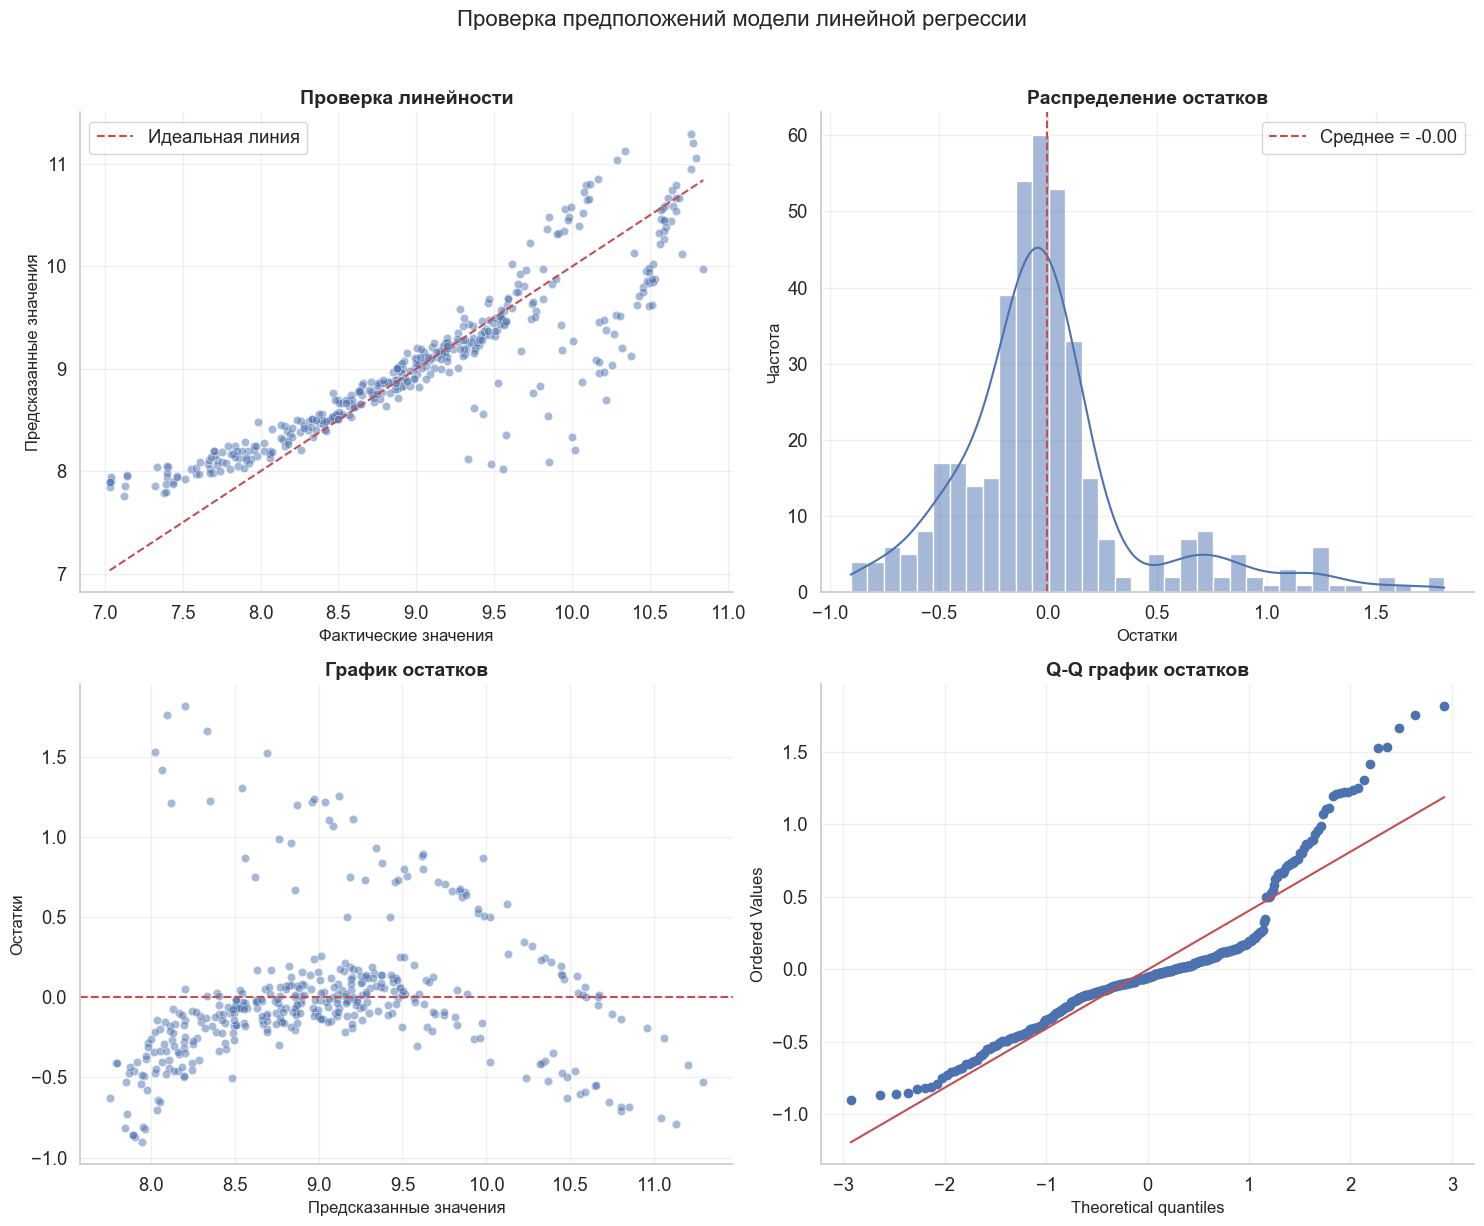


Статистические тесты:
Тест на нормальность остатков (p-value): 0.0000
Тест на гомоскедастичность (p-value): 0.0000


In [33]:
# Проверка предположений модели
import scipy.stats as stats

# Создаем график для анализа
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Проверка предположений модели линейной регрессии', fontsize=16, y=1.02)

# 1. Линейность: Фактические vs Предсказанные значения
sns.scatterplot(
    x=y_test,
    y=y_pred_sk,
    ax=axes[0, 0],
    alpha=0.5
)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', label='Идеальная линия')
axes[0, 0].set_xlabel('Фактические значения')
axes[0, 0].set_ylabel('Предсказанные значения')
axes[0, 0].set_title('Проверка линейности')
axes[0, 0].legend()

# 2. Нормальность и среднее остатков
residuals = y_test - y_pred_sk
sns.histplot(residuals, kde=True, ax=axes[0, 1])
axes[0, 1].axvline(residuals.mean(), color='r', linestyle='--',
                   label=f'Среднее = {residuals.mean():.2f}')
axes[0, 1].set_xlabel('Остатки')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].set_title('Распределение остатков')
axes[0, 1].legend()

# 3. График остатков
sns.scatterplot(x=y_pred_sk, y=residuals, ax=axes[1, 0], alpha=0.5)
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Предсказанные значения')
axes[1, 0].set_ylabel('Остатки')
axes[1, 0].set_title('График остатков')

# 4. Q-Q график
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q график остатков')

plt.tight_layout()
plt.show()

# Статистические тесты
print("\nСтатистические тесты:")
# Тест на нормальность остатков
_, p_value = stats.normaltest(residuals)
print(f"Тест на нормальность остатков (p-value): {p_value:.4f}")

# Тест на гомоскедастичность
_, p_value = stats.levene(y_test, y_pred_sk)
print(f"Тест на гомоскедастичность (p-value): {p_value:.4f}")

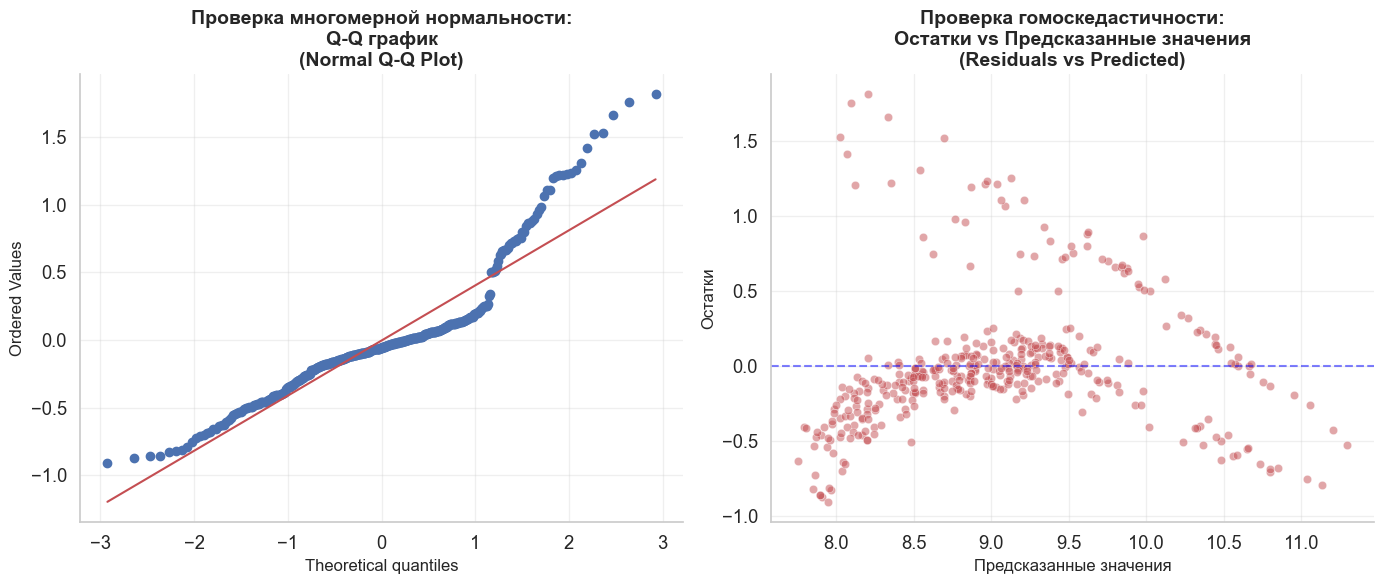

In [36]:
# Проверка предположений модели линейной регрессии

# Создание фигуры с двумя графиками
f, ax = plt.subplots(1, 2, figsize=(14, 6))

# 1. Проверка многомерной нормальности с помощью Q-Q графика
# Q-Q график показывает, насколько распределение остатков близко к нормальному
# Если точки лежат близко к диагональной линии, распределение близко к нормальному
import scipy as sp
_, (_, _, r) = sp.stats.probplot((y_test - y_pred_sk), fit=True, plot=ax[0])
ax[0].set_title('Проверка многомерной нормальности:\nQ-Q график\n(Normal Q-Q Plot)')

# 2. Проверка гомоскедастичности
# График остатков относительно предсказанных значений
# Если разброс остатков примерно одинаков вдоль горизонтальной оси,
# то предположение о гомоскедастичности выполняется
sns.scatterplot(
    y=(y_test - y_pred_sk),  # остатки
    x=y_pred_sk,             # предсказанные значения
    ax=ax[1],
    color='r',
    alpha=0.5               # добавляем прозрачность для лучшей визуализации
)
ax[0].grid(True, alpha=0.3)  # добавляем сетку
ax[1].grid(True, alpha=0.3)  # добавляем сетку
ax[1].axhline(y=0, color='blue', linestyle='--', alpha=0.5)  # добавляем горизонтальную линию y=0
ax[1].set_title('Проверка гомоскедастичности:\nОстатки vs Предсказанные значения\n(Residuals vs Predicted)')
ax[1].set_xlabel('Предсказанные значения')
ax[1].set_ylabel('Остатки')

plt.tight_layout()  # автоматическая настройка расположения графиков
plt.show();

In [37]:
# Проверка мультиколлинеарности
# Фактор инфляции дисперсии (Variance Inflation Factor, VIF)
# VIF показывает, насколько увеличивается дисперсия коэффициента регрессии
# из-за его корреляции с другими предикторами

# Формула: VIF = 1/(1-R²)
# Интерпретация значений VIF:
# * VIF = 1: Нет корреляции между предикторами
# * 1 < VIF < 5: Умеренная корреляция
# * VIF ≥ 5: Сильная мультиколлинеарность (проблема)
# * VIF ≥ 10: Очень сильная мультиколлинеарность (серьёзная проблема)

VIF = 1/(1 - R_square_sk)
print(f'Фактор инфляции дисперсии (VIF): {round(VIF, 4)}')
print(f'Заключение: {"Высокая мультиколлинеарность" if VIF >= 5 else "Умеренная корреляция" if VIF > 1 else "Нет корреляции"}')

Фактор инфляции дисперсии (VIF): 4.5366
Заключение: Умеренная корреляция


### Результаты проверки предположений линейной регрессии

Проанализируем основные предположения модели:

1. **Линейность**: График фактических значений относительно предсказанных имеет криволинейную форму, что указывает на нарушение предположения о линейности связи.

2. **Распределение остатков**: Среднее значение остатков близко к нулю, однако распределение имеет правостороннюю асимметрию.

3. **Нормальность**: Q-Q график показывает отклонение от нормальности при значениях больше 1.5, что проявляется в возрастающем тренде.

4. **Гомоскедастичность**: График остатков демонстрирует гетероскедастичность - дисперсия ошибок увеличивается после определенного значения.

5. **Мультиколлинеарность**: Значение фактора инфляции дисперсии (VIF) меньше 5, что говорит об отсутствии проблемы мультиколлинеарности между независимыми переменными.

*Примечание*: Выявленные нарушения предположений (особенно нелинейность и гетероскедастичность) указывают на необходимость дополнительной обработки данных или использования более сложных моделей.

In [38]:
# Импорт необходимых библиотек
import numpy as np  # для математических операций
import pandas as pd  # для работы с данными
import matplotlib.pyplot as plt  # для визуализации
import seaborn as sns  # для улучшенной визуализации
from sklearn.linear_model import LinearRegression  # модель линейной регрессии
from sklearn.model_selection import train_test_split  # разделение данных
from sklearn.metrics import mean_squared_error, r2_score  # метрики качества

# Настройка отображения графиков
plt.style.use('default')
sns.set_theme(style="whitegrid")  # установка стиля графиков

# Установка случайного семени для воспроизводимости результатов
np.random.seed(42)

## 2. Реализация простой линейной регрессии

### Пример: Зависимость цены дома от площади

В этом примере мы рассмотрим классическую задачу предсказания цены недвижимости на основе площади помещения.

### План работы:
1. Создание и подготовка данных
2. Построение и обучение модели
3. Оценка качества предсказаний
4. Визуализация результатов

### Предположения линейной регрессии:

1. **Линейность связи**
   - Зависимость между переменными должна быть линейной
   - Проверяется с помощью диаграммы рассеяния

2. **Независимость наблюдений**
   - Отсутствие автокорреляции
   - Каждое наблюдение независимо от других

3. **Нормальность распределения остатков**
   - Остатки должны следовать нормальному распределению
   - Проверяется с помощью Q-Q графика

4. **Гомоскедастичность**
   - Постоянство дисперсии остатков
   - Проверяется с помощью графика остатков

Эти предположения важны для:
- Корректной оценки параметров модели
- Надежности доверительных интервалов
- Точности предсказаний

Коэффициенты модели:
Наклон (m): 499.96
Смещение (b): 50004.15


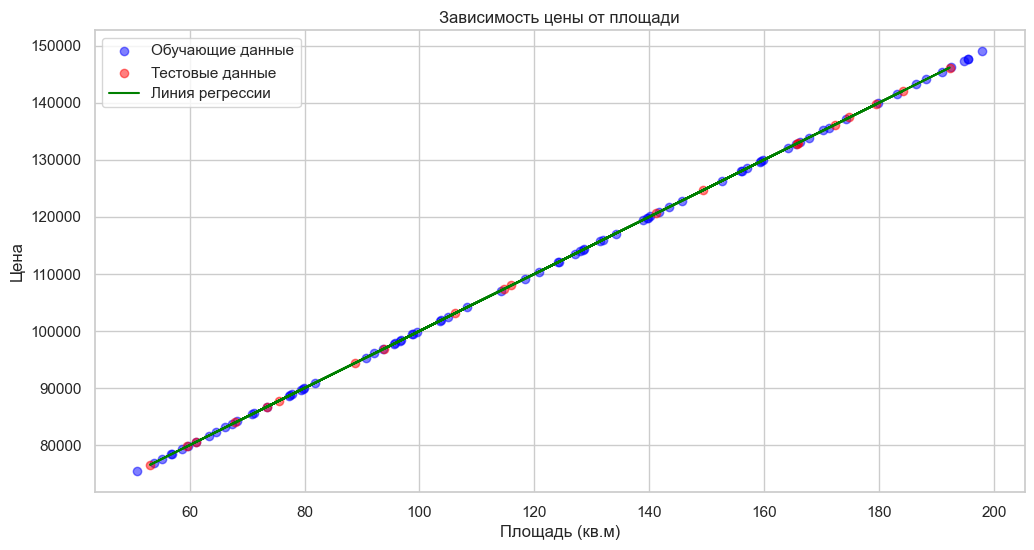

In [39]:
# Создание синтетических данных
n_samples = 100
площадь = np.random.uniform(50, 200, n_samples)
шум = np.random.normal(0, 15, n_samples)
цена = 500 * площадь + 50000 + шум

# Создание DataFrame
df = pd.DataFrame({
    'площадь': площадь,
    'цена': цена
})

# Разделение данных на обучающую и тестовую выборки
X = df[['площадь']]
y = df['цена']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Получение предсказаний
y_pred = model.predict(X_test)

# Вывод коэффициентов модели
print("Коэффициенты модели:")
print(f"Наклон (m): {model.coef_[0]:.2f}")
print(f"Смещение (b): {model.intercept_:.2f}")

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Обучающие данные')
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Тестовые данные')
plt.plot(X_test, y_pred, color='green', label='Линия регрессии')
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Цена')
plt.title('Зависимость цены от площади')
plt.legend()
plt.grid(True)
plt.show()

## 3. Метрики оценки модели

### Основные метрики качества регрессионных моделей:

1. **Коэффициент детерминации (R²)**
   
   $R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

   - Показывает долю объясненной дисперсии
   - Значения от 0 до 1
   - R² = 1 означает идеальную модель
   - R² ≤ 0 означает модель хуже, чем простое среднее

2. **Среднеквадратическая ошибка (MSE)**

   $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$

   - Квадратичная мера ошибок
   - Сильно штрафует большие отклонения
   - В тех же единицах измерения, что и целевая переменная в квадрате

3. **Корень из среднеквадратической ошибки (RMSE)**

   $RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2}$

   - В тех же единицах измерения, что и целевая переменная
   - Легче интерпретировать, чем MSE

4. **Средняя абсолютная ошибка (MAE)**

   $MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}|$

   - Линейная мера ошибок
   - Более устойчива к выбросам, чем MSE
   - В тех же единицах измерения, что и целевая переменная

где:
- $y_i$ - фактические значения
- $\hat{y_i}$ - предсказанные значения
- $\bar{y}$ - среднее значение фактических данных
- $n$ - количество наблюдений

Метрики качества модели:
R-квадрат: 1.0000
Среднеквадратическая ошибка (MSE): 147.08
Корень из среднеквадратической ошибки (RMSE): 12.13
Средняя абсолютная ошибка (MAE): 8.87


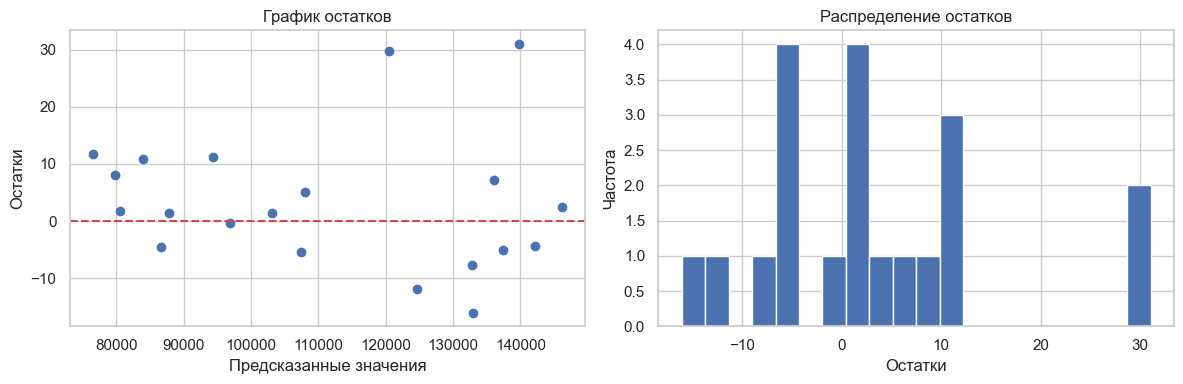

In [40]:
# Расчет метрик качества модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))

print("Метрики качества модели:")
print(f"R-квадрат: {r2:.4f}")
print(f"Среднеквадратическая ошибка (MSE): {mse:.2f}")
print(f"Корень из среднеквадратической ошибки (RMSE): {rmse:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")

# Визуализация остатков
residuals = y_test - y_pred

plt.figure(figsize=(12, 4))

# График остатков
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')

# Гистограмма остатков
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20)
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Распределение остатков')

plt.tight_layout()
plt.show()

## 4. Множественная линейная регрессия

Множественная линейная регрессия позволяет использовать несколько независимых переменных для предсказания целевой переменной.

### Математическая формула:
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$

где:
- $y$ - зависимая переменная
- $x_1, x_2, ..., x_n$ - независимые переменные
- $\beta_0$ - свободный член
- $\beta_1, \beta_2, ..., \beta_n$ - коэффициенты регрессии
- $\epsilon$ - случайная ошибка

### Матричная форма:
$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$

### Оценка коэффициентов:
$\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$

### Пример: Предсказание цены дома
В нашем примере мы будем использовать следующие характеристики:
- Площадь помещения ($x_1$)
- Количество комнат ($x_2$)
- Возраст здания ($x_3$)

### Особенности множественной регрессии:
1. **Мультиколлинеарность**
   - Сильная корреляция между независимыми переменными
   - Может привести к нестабильности оценок коэффициентов

2. **Выбор признаков**
   - Не все признаки одинаково важны
   - Необходимо выбирать значимые предикторы

3. **Интерпретация**
   - Коэффициенты показывают вклад каждой переменной
   - Важно учитывать масштаб переменных

## Регуляризация

Регуляризация - это метод предотвращения переобучения модели путем добавления штрафного члена к функции потерь. Этот метод помогает контролировать сложность модели и улучшает её обобщающую способность.

### Основные типы регуляризации:

1. **L1 регуляризация (Лассо, Lasso)**
   $$\text{Loss} = \text{MSE} + \lambda \sum_{i=1}^n |\beta_i|$$
   - Добавляет абсолютные значения коэффициентов в функцию потерь
   - Способствует разреженности модели (sparse model)
   - Может обнулять коэффициенты несущественных признаков
   - Полезна для отбора признаков (feature selection)

2. **L2 регуляризация (Ридж, Ridge)**
   $$\text{Loss} = \text{MSE} + \lambda \sum_{i=1}^n \beta_i^2$$
   - Добавляет квадраты коэффициентов в функцию потерь
   - Уменьшает величину всех коэффициентов
   - Особенно эффективна при наличии мультиколлинеарности
   - Сохраняет все признаки, но уменьшает их влияние

3. **Эластичная сеть (Elastic Net)**
   $$\text{Loss} = \text{MSE} + \lambda_1 \sum_{i=1}^n |\beta_i| + \lambda_2 \sum_{i=1}^n \beta_i^2$$
   - Комбинирует L1 и L2 регуляризацию
   - Сочетает преимущества обоих методов
   - Два параметра регуляризации ($\lambda_1$ и $\lambda_2$)
   - Хорошо работает при наличии коррелированных признаков

### Преимущества регуляризации:

1. **Борьба с переобучением**
   - Ограничивает сложность модели
   - Улучшает обобщающую способность
   - Снижает дисперсию оценок

2. **Улучшение численной стабильности**
   - Решает проблему мультиколлинеарности
   - Стабилизирует оценки коэффициентов
   - Улучшает обусловленность матрицы признаков

3. **Интерпретируемость**
   - L1: Автоматический отбор признаков
   - L2: Стабильные оценки важности признаков
   - Elastic Net: Группировка коррелированных признаков

### Выбор параметра регуляризации $\lambda$:

- $\lambda = 0$: Отсутствие регуляризации (обычная линейная регрессия)
- Малые значения $\lambda$: Слабая регуляризация, более сложная модель
- Большие значения $\lambda$: Сильная регуляризация, более простая модель
- Оптимальное значение обычно выбирается с помощью кросс-валидации

### Рекомендации по применению:

1. **Выбор типа регуляризации:**
   - L1 (Лассо): Когда нужен отбор признаков
   - L2 (Ридж): При наличии мультиколлинеарности
   - Elastic Net: Когда нужны оба эффекта

2. **Предварительная обработка данных:**
   - Стандартизация признаков обязательна
   - Удаление или обработка выбросов
   - Проверка мультиколлинеарности

In [44]:
# Чтение данных
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Подготовка данных
df = pd.read_csv('insurance.csv')  # чтение данных

# Преобразование категориальных переменных
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

# Выбор числовых признаков
numeric_features = ['age', 'bmi', 'children']

# Добавление закодированных категориальных признаков
categorical_features = [col for col in df_encoded.columns 
                      if col not in numeric_features + ['charges']]

# Объединение признаков
X = df_encoded[numeric_features + categorical_features]
y = df_encoded['charges']

# Стандартизация числовых признаков
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X[numeric_features])
X[numeric_features] = X_numeric_scaled

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

E:\GENAI\_tmp\ipykernel_18052\4265788545.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_features] = X_numeric_scaled


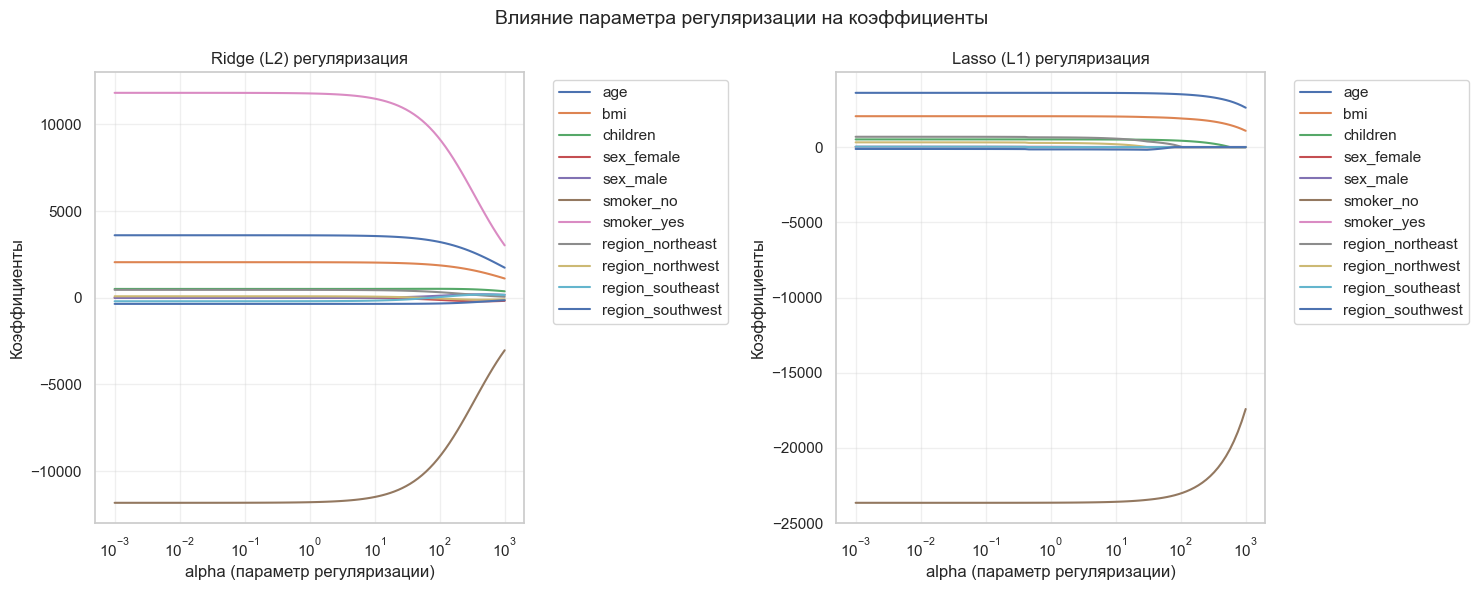

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e+09, tolerance: 1.266e+07
  model = cd_fast.enet_coordinate_descent(



Оптимальные значения параметра регуляризации:
Ridge: alpha = 2.3300
Lasso: alpha = 82.8643


In [45]:
# Визуализация влияния параметра регуляризации
import numpy as np
import matplotlib.pyplot as plt

# Создаем список значений alpha для регуляризации
alphas = np.logspace(-3, 3, 100)

# Списки для хранения коэффициентов
coefs_ridge = []
coefs_lasso = []

# Вычисляем коэффициенты для разных значений alpha
for alpha in alphas:
    try:
        # Ridge регрессия
        ridge = Ridge(alpha=alpha, max_iter=1000)
        ridge.fit(X_train, y_train)
        coefs_ridge.append(ridge.coef_)
        
        # Lasso регрессия
        lasso = Lasso(alpha=alpha, max_iter=1000)
        lasso.fit(X_train, y_train)
        coefs_lasso.append(lasso.coef_)
    except:
        print(f"Предупреждение: не удалось выполнить подгонку для alpha = {alpha}")
        continue

# Преобразуем списки в массивы numpy
coefs_ridge = np.array(coefs_ridge)
coefs_lasso = np.array(coefs_lasso)

# Создаем график
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Влияние параметра регуляризации на коэффициенты', fontsize=14)

# График для Ridge регрессии
for i in range(X.shape[1]):
    ax1.plot(alphas, coefs_ridge[:, i], label=X.columns[i])
ax1.set_xscale('log')
ax1.set_xlabel('alpha (параметр регуляризации)')
ax1.set_ylabel('Коэффициенты')
ax1.set_title('Ridge (L2) регуляризация')
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# График для Lasso регрессии
for i in range(X.shape[1]):
    ax2.plot(alphas, coefs_lasso[:, i], label=X.columns[i])
ax2.set_xscale('log')
ax2.set_xlabel('alpha (параметр регуляризации)')
ax2.set_ylabel('Коэффициенты')
ax2.set_title('Lasso (L1) регуляризация')
ax2.grid(True, alpha=0.3)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Выводим оптимальные значения alpha
from sklearn.model_selection import cross_val_score

alphas_test = np.logspace(-2, 2, 50)
ridge_scores = []
lasso_scores = []

for alpha in alphas_test:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    
    ridge_score = cross_val_score(ridge, X_train, y_train, cv=5).mean()
    lasso_score = cross_val_score(lasso, X_train, y_train, cv=5).mean()
    
    ridge_scores.append(ridge_score)
    lasso_scores.append(lasso_score)

print("\nОптимальные значения параметра регуляризации:")
print(f"Ridge: alpha = {alphas_test[np.argmax(ridge_scores)]:.4f}")
print(f"Lasso: alpha = {alphas_test[np.argmax(lasso_scores)]:.4f}")

### Анализ влияния регуляризации

На графиках выше показано, как меняются коэффициенты модели при различных значениях параметра регуляризации (alpha):

1. **Ridge регрессия (L2)**:
   - Коэффициенты плавно уменьшаются с увеличением alpha
   - Никогда не достигают точно нуля
   - Сохраняют относительную важность признаков

2. **Lasso регрессия (L1)**:
   - Коэффициенты могут становиться точно равными нулю
   - Более резкие изменения коэффициентов
   - Выполняет отбор признаков

### Практические рекомендации:

1. **Выбор типа регуляризации**:
   - Ridge: когда все признаки важны
   - Lasso: когда нужно отобрать важные признаки
   - Elastic Net: когда не уверены или нужен компромисс

2. **Выбор параметра alpha**:
   - Использовать кросс-валидацию
   - Начинать с небольших значений (0.01-0.1)
   - Учитывать масштаб целевой переменной

3. **Предварительная обработка данных**:
   - Всегда стандартизировать признаки
   - Удалять или обрабатывать выбросы
   - Проверять мультиколлинеарность

In [46]:
# Создание синтетических данных для множественной регрессии
n_samples = 200

# Генерация признаков
площадь = np.random.uniform(50, 200, n_samples)
комнаты = np.random.randint(1, 6, n_samples)
возраст = np.random.uniform(0, 50, n_samples)
шум = np.random.normal(0, 20000, n_samples)

# Генерация целевой переменной
цена = (500 * площадь + 50000 * комнаты - 1000 * возраст + 100000 + шум)

# Создание DataFrame
df_multi = pd.DataFrame({
    'площадь': площадь,
    'комнаты': комнаты,
    'возраст': возраст,
    'цена': цена
})

# Разделение на признаки и целевую переменную
X_multi = df_multi[['площадь', 'комнаты', 'возраст']]
y_multi = df_multi['цена']

# Разделение на обучающую и тестовую выборки
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Создание и обучение модели
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Получение предсказаний
y_pred_multi = model_multi.predict(X_test_multi)

# Вывод коэффициентов
print("Коэффициенты модели:")
for feature, coef in zip(X_multi.columns, model_multi.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Смещение: {model_multi.intercept_:.2f}")

# Оценка качества модели
r2_multi = r2_score(y_test_multi, y_pred_multi)
print(f"\nR-квадрат: {r2_multi:.4f}")

Коэффициенты модели:
площадь: 539.64
комнаты: 49275.74
возраст: -1099.79
Смещение: 102144.80

R-квадрат: 0.8977


## 5. Визуализация и анализ результатов

В этом разделе мы рассмотрим различные способы визуализации результатов регрессионного анализа:

1. Диаграммы рассеяния (scatter plots)
2. Парные графики (pairplot)
3. Графики остатков
4. Тепловая карта корреляций

Эти визуализации помогают:
- Оценить качество модели
- Выявить нелинейные зависимости
- Обнаружить выбросы
- Проверить предположения модели

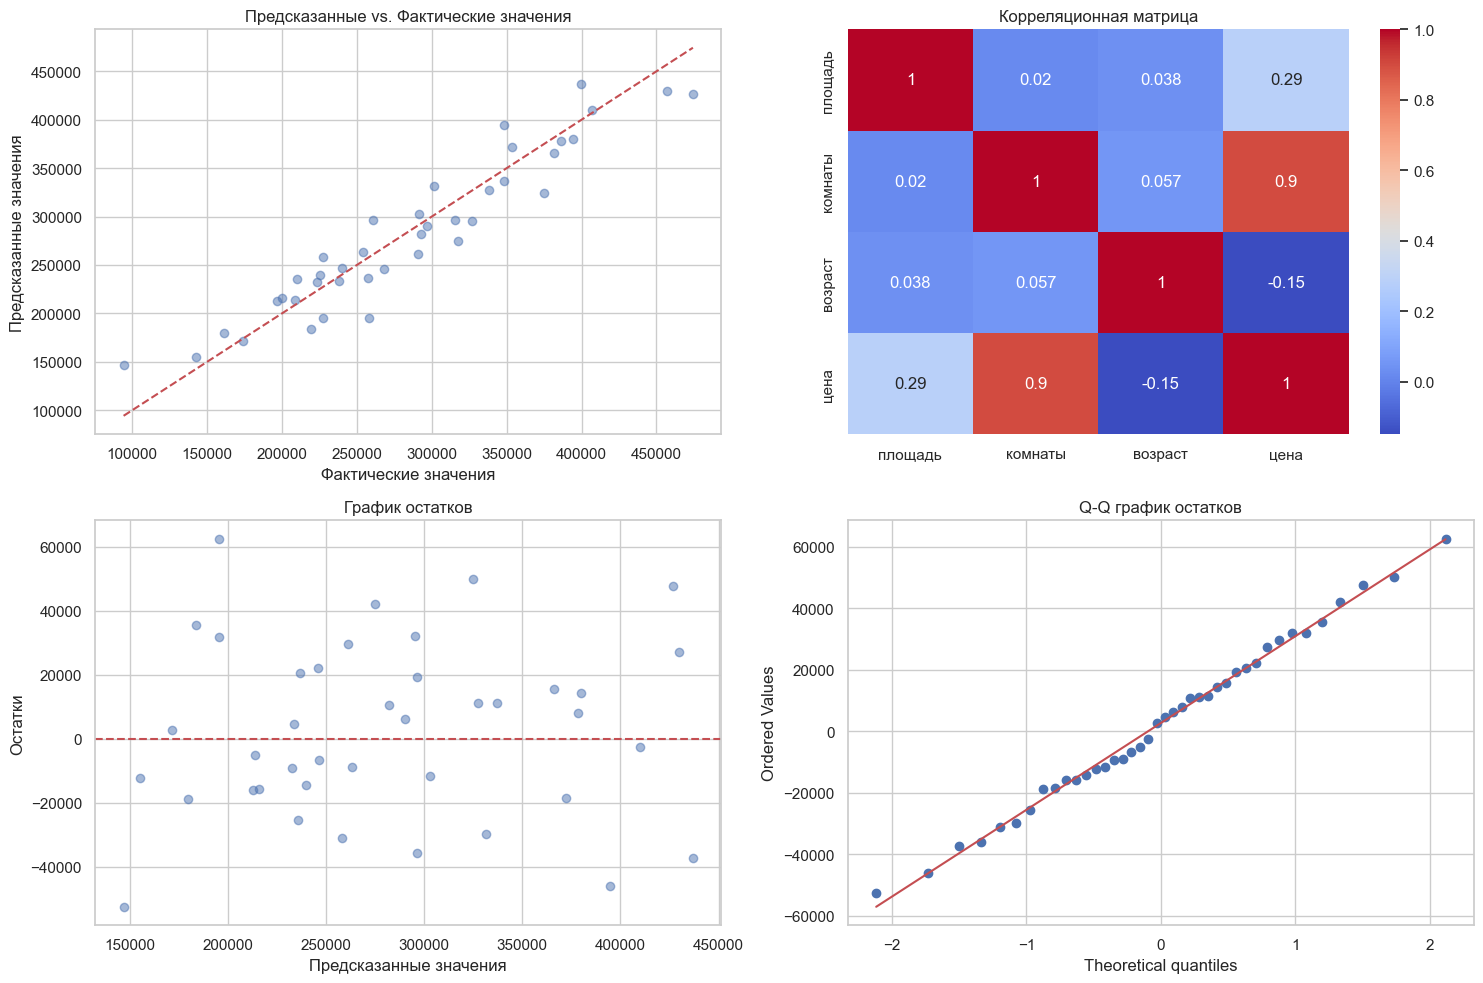

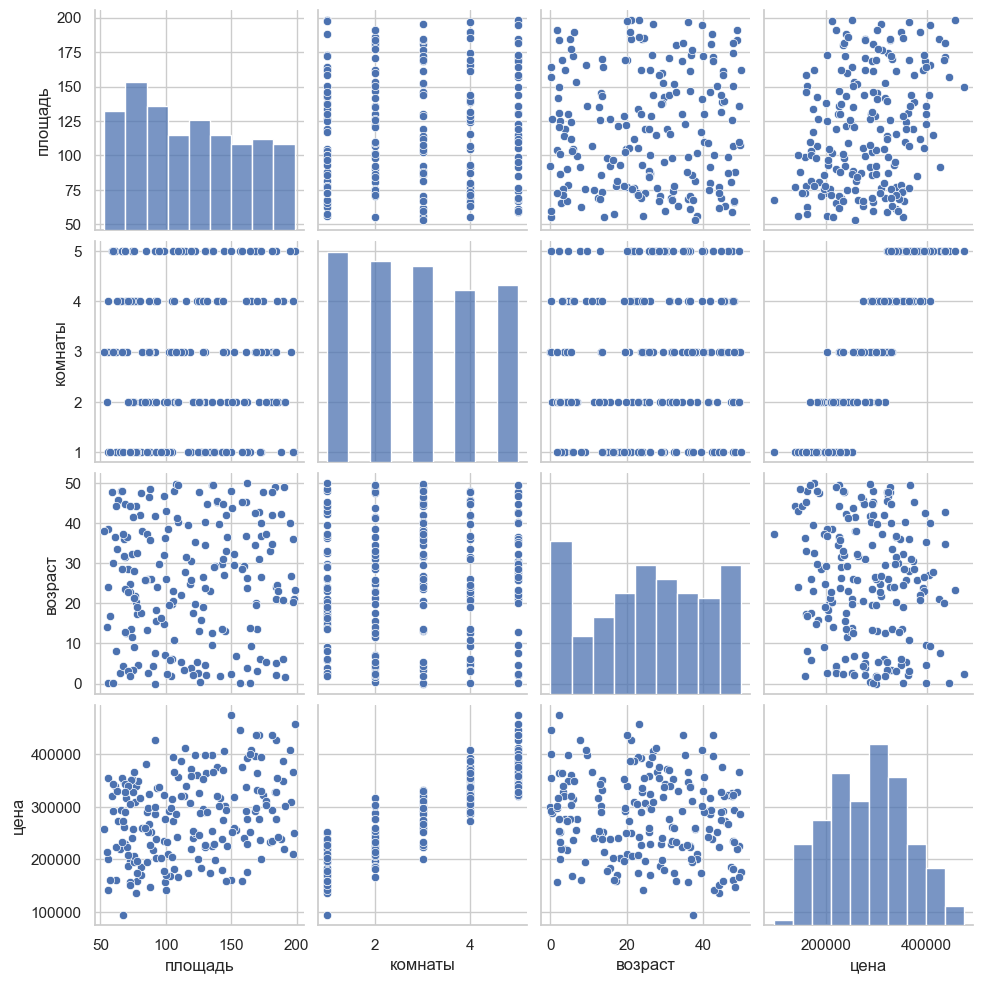

In [47]:
# Создание визуализаций для анализа результатов
plt.figure(figsize=(15, 10))

# График предсказанных vs. фактических значений
plt.subplot(2, 2, 1)
plt.scatter(y_test_multi, y_pred_multi, alpha=0.5)
plt.plot([y_test_multi.min(), y_test_multi.max()], [y_test_multi.min(), y_test_multi.max()], 'r--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные vs. Фактические значения')

# Корреляционная матрица
plt.subplot(2, 2, 2)
sns.heatmap(df_multi.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')

# График остатков
residuals_multi = y_test_multi - y_pred_multi
plt.subplot(2, 2, 3)
plt.scatter(y_pred_multi, residuals_multi, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')

# QQ-plot для проверки нормальности остатков
plt.subplot(2, 2, 4)
stats.probplot(residuals_multi, dist="norm", plot=plt)
plt.title('Q-Q график остатков')

plt.tight_layout()
plt.show()

# Дополнительная визуализация: парные графики
sns.pairplot(df_multi)
plt.show()

## Заключение

В данной лекции мы рассмотрели:

1. **Основы линейной регрессии**
   - Математическое обоснование
   - Предположения модели
   - Функция потерь

2. **Практическая реализация**
   - Простая линейная регрессия
   - Множественная линейная регрессия
   - Работа с реальными данными

3. **Оценка качества модели**
   - R-квадрат
   - MSE и RMSE
   - Анализ остатков

4. **Визуализация результатов**
   - Диаграммы рассеяния
   - Корреляционные матрицы
   - Графики остатков

### Рекомендации по дальнейшему изучению:
1. Изучите другие типы регрессии (полиномиальная, регуляризованная)
2. Практикуйтесь на реальных данных
3. Освойте методы обработки выбросов и пропущенных значений
4. Изучите способы выбора признаков для модели